In [11]:
import sys
sys.path.append("../src")

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

from lib.i_o import read_csv

In [12]:
df_x_train = read_csv("X_train.csv", "../data/")
df_y_train = read_csv("y_train.csv", "../data/")

Read data from ../data/X_train.csv
Read data from ../data/y_train.csv


In [13]:
print(f"#Features: {df_x_train.shape[1]}\n#observations: {df_x_train.shape[0]}")

#Features: 833
#observations: 1212


In [14]:
df_x_train.describe()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
count,1212.000000,1121.000000,1128.000000,1124.000000,1121.000000,1138.000000,1133.000000,1115.000000,1113.000000,1129.000000,...,1122.000000,1128.000000,1117.000000,1116.000000,1102.000000,1111.000000,1117.000000,1120.000000,1132.000000,1116.000000
mean,605.500000,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,...,10069.191241,13274.793928,812.316152,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085
std,350.018571,2314.735855,1570.611458,443.431441,9708.061111,2.834582,9.566001,981.199159,278.859974,288.802549,...,964.684756,2160.273617,180.550450,2.805768,2.819128,523.215963,0.263641,265.345180,29.172210,1014.488328
min,0.000000,5636.623777,6764.060541,1849.453269,65828.916291,100.056578,70.232469,6797.836298,10000.771287,10000.339782,...,7109.997185,4100.700865,164.997735,100.040624,100.015930,750.038434,1.590647,663.173673,1000.067137,6383.771227
25%,302.750000,13846.177869,9859.438276,3152.193184,93497.927859,102.679233,93.586112,9351.114468,10260.607893,10242.516364,...,9416.786301,11977.061474,694.099781,102.584331,102.615677,2155.245200,2.537801,1177.188917,1028.203921,9316.722099
50%,605.500000,15048.467618,10839.483074,3401.539562,100053.800306,105.029940,99.670635,9991.006638,10498.862876,10494.225267,...,10064.750764,13160.555394,792.045039,104.969600,105.136788,2459.092168,2.710103,1362.350726,1053.778881,9981.210986
75%,908.250000,16653.018233,11902.078799,3698.564818,106139.852699,107.516555,106.045433,10588.909713,10732.429943,10734.838005,...,10696.714321,14512.572842,925.032457,107.309535,107.407093,2791.051349,2.887536,1535.159914,1077.716726,10647.455420
max,1211.000000,28273.690135,17777.338221,5622.951648,133145.632257,110.087261,130.142499,13865.848591,11000.062311,10999.403374,...,13173.145338,24901.251674,1589.225040,110.072565,110.069056,4904.988601,3.795277,2506.104650,1099.975679,13265.026039


In [15]:
df_y_train['y'].describe()

count    1212.000000
mean       69.889439
std         9.720843
min        42.000000
25%        64.000000
50%        70.000000
75%        77.000000
max        97.000000
Name: y, dtype: float64

In [16]:
# df_y_train.set_index('id', inplace=True)
# df_x_train.set_index('id', inplace=True)

In [17]:
from sklearn.impute import SimpleImputer
df_impute_before = df_x_train.drop(columns='id')

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_impute_before)
df_x_train_imputed = pd.DataFrame(imp.transform(df_impute_before))

In [18]:
df_x_train_imputed.describe()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,9.985880,...,10069.191241,13274.793928,812.316152,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085
std,2226.067754,1515.160528,427.016139,9336.184837,2.746611,9.248719,941.082486,267.218490,278.729862,0.958969,...,928.145687,2084.004479,173.323959,2.692260,2.688044,500.922343,0.253089,255.066942,28.192174,973.447237
min,5636.623777,6764.060541,1849.453269,65828.916291,100.056578,70.232469,6797.836298,10000.771287,10000.339782,6.759685,...,7109.997185,4100.700865,164.997735,100.040624,100.015930,750.038434,1.590647,663.173673,1000.067137,6383.771227
25%,13931.809724,9926.530547,3170.385944,94358.738184,102.811093,94.195727,9428.209799,10284.999365,10263.060018,9.375400,...,9479.523877,12076.791406,702.078405,102.864339,102.902380,2181.823042,2.557012,1194.652957,1030.447895,9382.893669
50%,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,9.985880,...,10069.191241,13274.793928,809.042463,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085
75%,16485.603116,11751.038613,3668.158481,105531.874497,107.353976,105.397439,10491.489465,10700.871543,10718.409364,10.606376,...,10648.249140,14431.290607,911.343060,106.993646,107.185396,2743.530473,2.868703,1517.190330,1076.100611,10584.942325
max,28273.690135,17777.338221,5622.951648,133145.632257,110.087261,130.142499,13865.848591,11000.062311,10999.403374,13.828922,...,13173.145338,24901.251674,1589.225040,110.072565,110.069056,4904.988601,3.795277,2506.104650,1099.975679,13265.026039


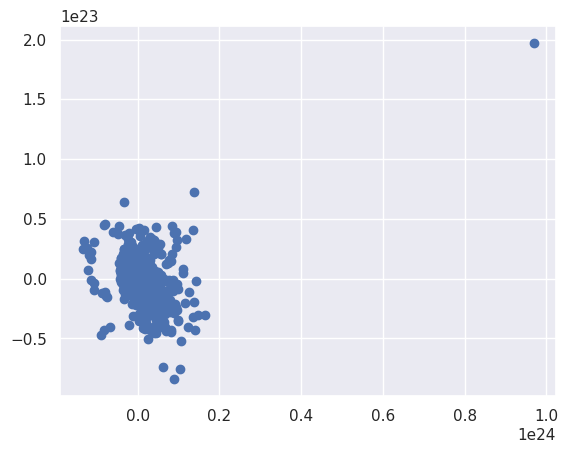

In [19]:
# EDA for outliers
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca.fit(df_x_train_imputed.drop(columns=['y']))
pca.fit(df_x_train_imputed)
X_pca_before = pca.transform(df_x_train_imputed)

plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1]);

In [20]:
# Detect out / inliers
from sklearn.ensemble import IsolationForest
X = np.array(df_x_train_imputed)
clf = IsolationForest(n_estimators=9, warm_start=True)
clf.fit(X)  

isof_pred = clf.predict(X)
print("Outliers = -1, Inliers = 1")
pd.Series(isof_pred).value_counts()

Outliers = -1, Inliers = 1


 1    1015
-1     197
dtype: int64

In [21]:
# Join out / inlier column
df_x_train_imputed['isof_cat'] = isof_pred
df_x_train_imputed['is_inlier'] = df_x_train_imputed['isof_cat'] == 1
df_x_train_imputed['is_inlier'].value_counts()

True     1015
False     197
Name: is_inlier, dtype: int64

In [22]:
# Join y column
df_x_train_imputed['id'] = df_x_train['id']
df_x_train_imputed = df_x_train_imputed.merge(df_y_train, how='left', left_on='id', right_on='id')

In [23]:
# Remove outliers
df_x_train_inliers = df_x_train_imputed[df_x_train_imputed['is_inlier']].drop(columns=['id', 'is_inlier', 'isof_cat'])

In [24]:
# Prepare data for splitting
X = df_x_train_inliers.drop(columns='y')
y = df_x_train_inliers['y']

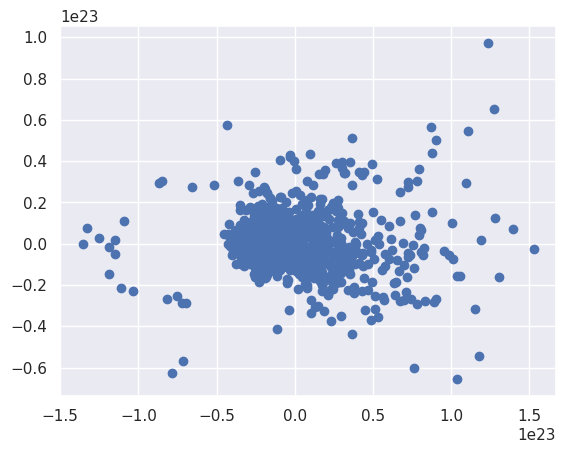

In [25]:
# Check outlier detection
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca.fit(df_x_train_imputed.drop(columns=['y']))
pca.fit(df_x_train_inliers.drop(columns=['y']))
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1]);

In [26]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1) 

In [27]:
# Standardize features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [28]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,0.327172,0.844877,-0.614966,-1.457515,1.356737,-0.821180,0.958561,-1.150237,-1.752386,-0.652232,...,-2.579853,-1.238647,0.829662,-0.011658,-1.484763,0.066007,-1.154082,-0.786863,-1.092354,-0.179044
1,0.259586,-0.072577,0.066254,-0.744200,-1.541797,-0.774189,0.343806,1.008052,-0.356315,-0.089618,...,0.940599,0.183937,-0.021226,-0.838240,1.747198,0.681215,0.019625,-1.110167,-1.401579,-1.689174
2,-1.611150,-0.386121,-1.494456,0.483631,-0.553026,0.205912,-0.134722,0.841853,0.884102,1.006570,...,1.180824,-0.868616,-0.637072,1.363189,0.002588,0.356077,2.202885,-0.997863,0.060906,-0.490261
3,-1.177860,-0.796338,-0.592801,-0.092206,1.559981,0.960118,0.642163,0.476171,1.187601,-0.041764,...,-0.748971,-0.472371,-0.001841,1.196002,0.559116,-1.731836,-0.318315,-1.000347,0.048688,-0.644925
4,1.645377,0.267263,0.053114,0.675486,-0.480910,1.379176,-1.194832,-1.773342,1.072195,0.300569,...,0.196737,0.022823,-0.490111,0.694428,-0.553751,1.287954,-0.618025,-2.330535,-0.897129,1.170019


In [30]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
count,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,...,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02
mean,-6.764455e-16,1.924845e-16,2.749778e-16,-7.836868e-17,2.741529e-15,5.073341e-16,3.739699e-16,-9.184260e-16,2.055975e-15,-5.664543e-16,...,-4.014676e-16,4.509637e-16,-3.657205e-16,-2.874893e-15,-4.124668e-15,4.344650e-16,3.877188e-16,-6.750706e-16,-2.612289e-16,-7.967483e-16
std,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,...,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00,1.000775e+00
min,-4.404649e+00,-2.680924e+00,-3.326530e+00,-3.563183e+00,-1.913017e+00,-3.070944e+00,-3.351375e+00,-1.843084e+00,-1.812272e+00,-3.255784e+00,...,-3.096471e+00,-3.702859e+00,-2.982429e+00,-1.795213e+00,-1.881351e+00,-3.203608e+00,-2.846836e+00,-2.679876e+00,-1.922861e+00,-3.600933e+00
25%,-5.824289e-01,-6.759245e-01,-6.095143e-01,-6.275441e-01,-7.422138e-01,-6.513191e-01,-5.805847e-01,-8.386895e-01,-8.014497e-01,-6.437439e-01,...,-6.783328e-01,-5.791085e-01,-6.429659e-01,-7.741093e-01,-7.737355e-01,-6.060718e-01,-6.535381e-01,-6.811697e-01,-7.867948e-01,-5.941678e-01
50%,-1.909820e-02,-1.051953e-02,6.819578e-04,4.294094e-02,-4.812478e-02,-2.556801e-02,-1.189079e-02,1.190646e-02,-3.775585e-02,-4.176410e-02,...,1.182948e-03,2.282312e-02,-9.231911e-03,3.326673e-02,2.588175e-03,-3.000602e-02,-5.307645e-03,4.983529e-03,-3.525862e-02,6.237382e-04
75%,5.649704e-01,5.461461e-01,5.538703e-01,5.869949e-01,8.365558e-01,6.209839e-01,5.435402e-01,7.768115e-01,7.988572e-01,6.451284e-01,...,6.382744e-01,5.564237e-01,6.127822e-01,7.195155e-01,7.688424e-01,5.387928e-01,4.958794e-01,6.488178e-01,8.507906e-01,6.427044e-01
max,5.954104e+00,4.475698e+00,5.223798e+00,3.336361e+00,1.795410e+00,3.354635e+00,4.058952e+00,1.892602e+00,1.772097e+00,3.915862e+00,...,2.821649e+00,5.781636e+00,4.556336e+00,1.921320e+00,1.870630e+00,4.986986e+00,4.471286e+00,4.421095e+00,1.676845e+00,3.288438e+00
